In [67]:
%matplotlib inline

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

In [69]:
from effort2.rates.BtoV import BtoV
from effort2.formfactors.formFactorBtoU import BToOmegaBSZ

In [70]:
bToOmegaBSZ = BToOmegaBSZ(
    m_B=5.27963,
    m_M=0.78265,
    m_L=0,
    A0_i=(-0.826659, 1.42113),
    A1_i=(0.242567, 0.342791, 0.0926204),
    A12_i=(0.270411, 0.65589, 0.277567),
    V_i=(0.304239, -0.832336, 1.71741),
    T1_i=(0.25137, -0.715314, 1.41463),
    T2_i=(0.412936, 0.460141),
    T23_i=(0.682582, 1.64618, 2.4695),
)

In [71]:
rate_bsz = BtoV(bToOmegaBSZ, 3e-3, bToOmegaBSZ.m_B, bToOmegaBSZ.m_M) 

In [72]:
%%time
# Look at this execution time, no caches implemented! This is why you should use the new version
rate_bsz.Gamma()

CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 3.03 ms


1.8168531842988193e-16

In [73]:
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [74]:
def get_q2(w, m_B=5.27963, m_M=0.78265):
    return m_B ** 2 + m_M ** 2 - 2 * w * m_B * m_M

In [75]:
def get_w(q2, m_B=5.27963, m_M=0.78265):
    return (- q2 + m_B ** 2 + m_M ** 2) / (2 * m_B * m_M)

In [76]:
w = np.linspace(rate_bsz.w_min, rate_bsz.w_max)

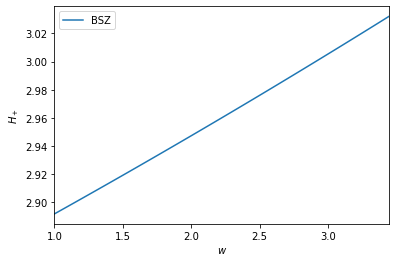

In [77]:
plt.plot(w, [rate_bsz.Hplus(x) for x in w], label="BSZ")
plt.xlim(min(w), max(w))
#plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$H_+$")
plt.legend()
plt.show()
plt.close()

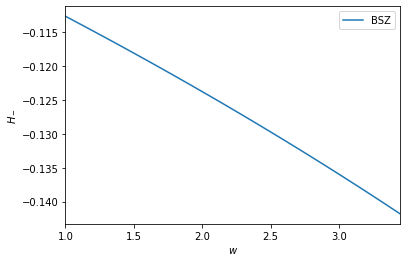

In [78]:
plt.plot(w, [rate_bsz.Hminus(x) for x in w], label="BSZ")
plt.xlim(min(w), max(w))
#plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$H_-$")
plt.legend()
plt.show()
plt.close()

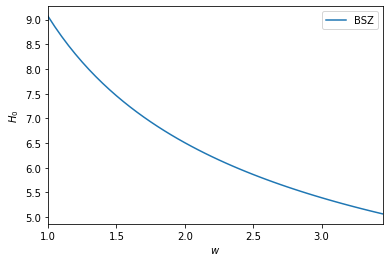

In [79]:
plt.plot(w, [rate_bsz.Hzero(x) for x in w], label="BSZ")
plt.xlim(min(w), max(w))
#plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$H_0$")
plt.legend()
plt.show()
plt.close()

The error thrown here happens when you evaluate at the exact boundary of the w range. It can be neglected or you add/subtract epsilon to the defined boundaries w_min and w_max (see documentation).

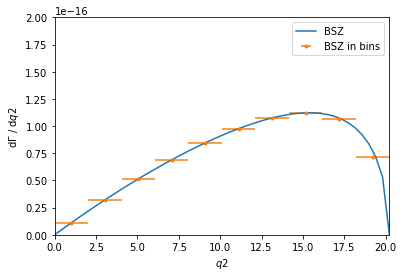

In [120]:
q2 = np.linspace(rate_bsz.w_min, rate_bsz.w_max)
wbins = np.linspace(rate_bsz.w_min, rate_bsz.w_max, num=11)

plt.plot(get_q2(w), [rate_bsz.dGamma_dw(x) for x in w], label="BSZ")
plt.errorbar(get_q2(wbins[:-1] + (wbins[1] - wbins[0]) / 2), [rate_bsz.DGamma_Dw(l, u)/ (u-l) for (l, u) in zip(wbins, wbins[1:])], marker='.', xerr=(get_q2(wbins[1]) - get_q2(wbins[0])) / 2, ls='', label="BSZ in bins")
plt.xlim(min(get_q2(w)), max(get_q2(w)))
plt.ylim(0, 2e-16)
plt.xlabel("$q2$")
plt.ylabel("d$\Gamma$ / d$q2$")
plt.legend()
plt.show()
plt.close()

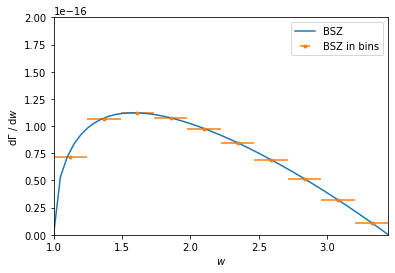

In [104]:
w = np.linspace(rate_bsz.w_min, rate_bsz.w_max)
wbins = np.linspace(rate_bsz.w_min, rate_bsz.w_max, num=11)

plt.plot(w, [rate_bsz.dGamma_dw(x) for x in w], label="BSZ")
plt.errorbar(wbins[:-1] + (wbins[1] - wbins[0]) / 2, [rate_bsz.DGamma_Dw(l, u)/ (u-l) for (l, u) in zip(wbins, wbins[1:])], marker='.', xerr=(wbins[1] - wbins[0]) / 2, ls='', label="BSZ in bins")
plt.xlim(min(w), max(w))
plt.ylim(0, 2e-16)
plt.xlabel("$w$")
plt.ylabel("d$\Gamma$ / d$w$")
plt.legend()
plt.show()
plt.close()

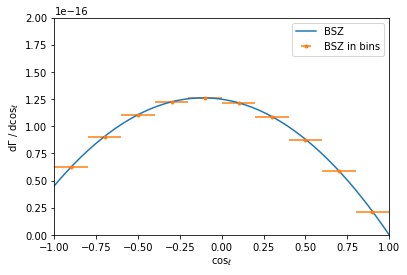

In [105]:
cosL = np.linspace(rate_bsz.cosL_min, rate_bsz.cosL_max)
cosLbins = np.linspace(rate_bsz.cosL_min, rate_bsz.cosL_max, num=11)

plt.plot(cosL, [rate_bsz.dGamma_dcosL(x) for x in cosL], label="BSZ")
plt.errorbar(cosLbins[:-1] + (cosLbins[1] - cosLbins[0]) / 2, [rate_bsz.DGamma_DcosL(l, u)/ (u-l) for (l, u) in zip(cosLbins, cosLbins[1:])], marker='.', xerr=(cosLbins[1] - cosLbins[0]) / 2, ls='', label="BSZ in bins")
plt.xlim(min(cosL), max(cosL))
plt.ylim(0, 2e-16)
plt.xlabel("$\cos_\ell$")
plt.ylabel("d$\Gamma$ / d$\cos_\ell$")
plt.legend()
plt.show()
plt.close()

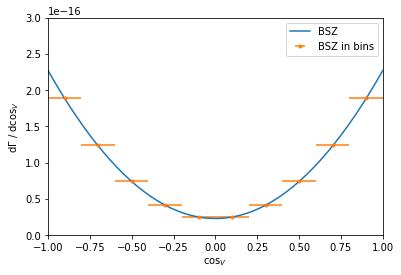

In [106]:
cosV = np.linspace(rate_bsz.cosV_min, rate_bsz.cosV_max)
cosVbins = np.linspace(rate_bsz.cosV_min, rate_bsz.cosV_max, num=11)

plt.plot(cosV, [rate_bsz.dGamma_dcosV(x) for x in cosV], label="BSZ")
plt.errorbar(cosVbins[:-1] + (cosVbins[1] - cosVbins[0]) / 2, [rate_bsz.DGamma_DcosV(l, u)/ (u-l) for (l, u) in zip(cosVbins, cosVbins[1:])], marker='.', xerr=(cosVbins[1] - cosVbins[0]) / 2, ls='', label="BSZ in bins")
plt.xlim(min(cosV), max(cosV))
plt.ylim(0, 3e-16)
plt.xlabel("$\cos_V$")
plt.ylabel("d$\Gamma$ / d$\cos_V$")
plt.legend()
plt.show()
plt.close()

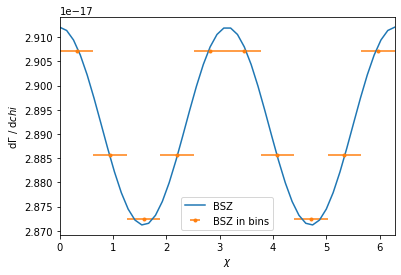

In [107]:
chi = np.linspace(rate_bsz.chi_min, rate_bsz.chi_max)
chibins = np.linspace(rate_bsz.chi_min, rate_bsz.chi_max, num=11)

plt.plot(chi, [rate_bsz.dGamma_dchi(x) for x in chi], label="BSZ")
plt.errorbar(chibins[:-1] + (chibins[1] - chibins[0]) / 2, [rate_bsz.DGamma_Dchi(l, u)/ (u-l) for (l, u) in zip(chibins, chibins[1:])], marker='.', xerr=(chibins[1] - chibins[0]) / 2, ls='', label="BSZ in bins")
plt.xlim(min(chi), max(chi))
#plt.ylim(0, 1e-16)
plt.xlabel("$\chi$")
plt.ylabel("d$\Gamma$ / d$chi$")
plt.legend()
plt.show()
plt.close()